In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as dates
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
%matplotlib inline

In [2]:
df = pd.read_csv('Almaty.csv')

In [3]:
df.head()

,STATION,NAME,DATE,TAVG,TMAX,TMIN
0,KZ000036870,"ALMATY, KZ",2005-01-01,29.0,37.0,23.0
1,KZ000036870,"ALMATY, KZ",2005-01-02,26.0,31.0,20.0
2,KZ000036870,"ALMATY, KZ",2005-01-03,24.0,38.0,16.0
3,KZ000036870,"ALMATY, KZ",2005-01-04,22.0,27.0,19.0
4,KZ000036870,"ALMATY, KZ",2005-01-05,28.0,37.0,23.0


In [191]:
df.drop('NAME',axis = 1,inplace = True)
df.drop('TAVG',axis = 1,inplace = True)
df['DATE']=pd.to_datetime(df['DATE'])

In [192]:
#Farenheit to Celcius
df['TMAX'] = df['TMAX'].apply(lambda x: (x-32)*5/9)
df['TMIN'] = df['TMIN'].apply(lambda x: (x-32)*5/9)

In [193]:
df['Year'] = df['DATE'].dt.year
df['MonthDay'] = df['DATE'].apply(lambda x: '{0:02}/{1:02}'.format(x.month,x.day))
df = df[df['MonthDay']!='02/29'] 
df.reset_index()
df_highs = df[(df.Year>=2005)&(df.Year<2015)].groupby(['MonthDay'])['TMAX'].max()
df_lows = df[(df.Year>=2005)&(df.Year<2015)].groupby(['MonthDay'])['TMIN'].min()
df.head()

,STATION,DATE,TMAX,TMIN,Year,MonthDay
0,KZ000036870,2005-01-01,2.777778,-5.000000,2005,01/01
1,KZ000036870,2005-01-02,-0.555556,-6.666667,2005,01/02
2,KZ000036870,2005-01-03,3.333333,-8.888889,2005,01/03
3,KZ000036870,2005-01-04,-2.777778,-7.222222,2005,01/04
4,KZ000036870,2005-01-05,2.777778,-5.000000,2005,01/05


In [184]:
df_highs.head()

MonthDay
01/01    2.777778
01/02    8.333333
01/03    6.666667
01/04    3.888889
01/05    2.777778
Name: TMAX, dtype: float64

In [194]:
df2015=df[df['Year']==2015]
df2015.head()

,STATION,DATE,TMAX,TMIN,Year,MonthDay
2314,KZ000036870,2015-01-01,10.000000,-3.333333,2015,01/01
2315,KZ000036870,2015-01-02,7.777778,NaN,2015,01/02
2316,KZ000036870,2015-01-03,0.000000,NaN,2015,01/03
2317,KZ000036870,2015-01-04,0.555556,-8.333333,2015,01/04
2318,KZ000036870,2015-01-05,7.222222,-5.555556,2015,01/05


In [195]:
df = df[df['DATE'].dt.year!=2015]
date_index = np.arange('2015-01-01','2016-01-01', dtype='datetime64[D]')
date_index = list(map(pd.to_datetime,date_index))

In [196]:
df2015['DATE'] = pd.to_datetime(df2015['DATE'])
df2015 = df2015.set_index('DATE')

Days in 2015 that broke a record high

In [161]:
highs2015 = df2015['TMAX']
highs2015 = highs2015.reindex(date_index , fill_value = -100)
highs2015.index = highs2015.index.to_series().apply(lambda x: '{0:02}/{1:02}'.format(x.month,x.day))
breaking_highs = highs2015[highs2015>df_highs]
new_index_h = breaking_highs.index.to_series().apply(lambda x:pd.to_datetime(x,format ='%m/%d'))
new_index_h = new_index_h.apply(lambda x: x.replace(year=2015))
df_highs2015 = pd.concat([new_index_h, breaking_highs], axis=1)
df_highs2015 = df_highs2015.set_index('DATE')
df_highs2015.head(5)

,TMAX
DATE,
2015-01-01,10.000000
2015-01-05,7.222222
2015-01-06,8.333333
2015-01-07,6.666667
2015-01-08,10.555556


In [160]:
#record lows 2015
lows2015 = df2015['TMIN']
lows2015 = lows2015.reindex(date_index , fill_value = 100)
lows2015.index = lows2015.index.to_series().apply(lambda x: '{0:02}/{1:02}'.format(x.month,x.day))
breaking_lows = lows2015[lows2015<df_lows]
new_index = breaking_lows.index.to_series().apply(lambda x:pd.to_datetime(x,format ='%m/%d'))
new_index = new_index.apply(lambda x: x.replace(year=2015))
df_lows2015 = pd.concat([new_index, breaking_lows], axis=1)
df_lows2015 = df_lows2015.set_index('DATE')
df_lows2015.head(5)

,TMIN
DATE,
2015-01-29,-17.777778
2015-03-13,-6.111111
2015-03-31,-11.666667
2015-04-01,-6.666667
2015-04-02,-2.777778


Text(0.5, 1.0, 'Weather patterns in Almaty for 2005-2015')

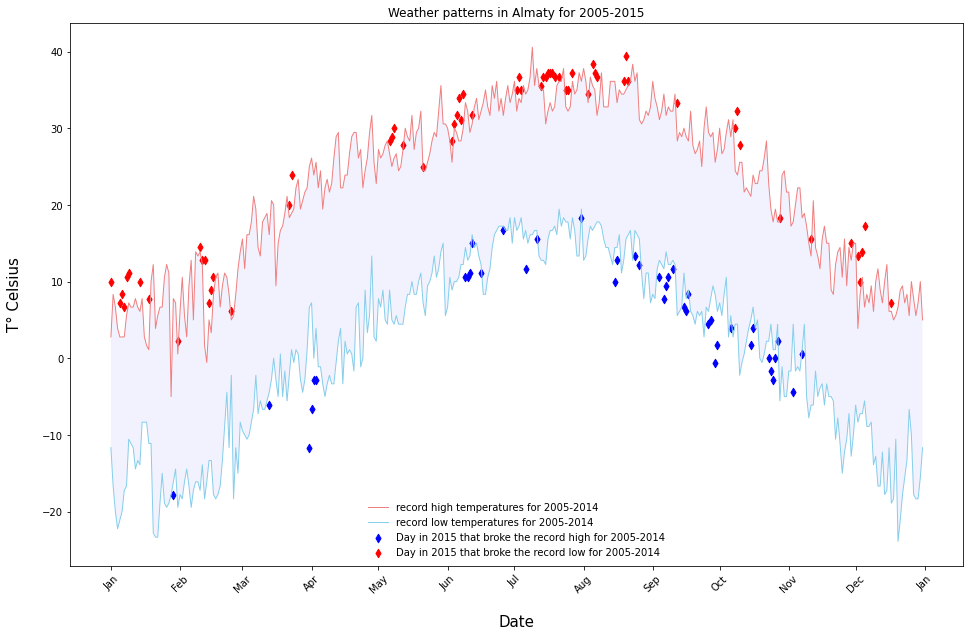

In [183]:
# Plot highs and lows
f, ax = plt.subplots(figsize=(16,10))
ax.plot(date_index, df_highs, color='lightcoral',linewidth=1)
ax.plot(date_index, df_lows, color='skyblue', linewidth=1)
ax.scatter(df_lows2015.index,df_lows2015['TMIN'],linewidth=1,color='blue',marker = "d")
ax.scatter(df_highs2015.index,df_highs2015['TMAX'],linewidth=1,color='red',marker = "d")
plt.xlabel('Date', fontsize=15)
plt.ylabel('T° Celsius', fontsize=15)
ax.xaxis.labelpad = 20
ax.yaxis.labelpad = 20
xfmt = mdates.DateFormatter('%b')
months = mdates.MonthLocator()
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(xfmt)
x = plt.gca().xaxis
plt.gca().fill_between(date_index,df_lows,df_highs,facecolor='blue',alpha=0.05) 
for item in x.get_ticklabels():
    item.set_rotation(45)
plt.legend(['record high temperatures for 2005-2014', 'record low temperatures for 2005-2014',
           'Day in 2015 that broke the record high for 2005-2014',
           'Day in 2015 that broke the record low for 2005-2014'], loc='lower center', frameon=False)
plt.title('Weather patterns in Almaty for 2005-2015')